# Deep learning with Python

Import IMDB dataset

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


Load data and create dictionary

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
dictionary=dict([(v,k) for (k,v) in imdb.get_word_index().items()])

Helper function for getting text from review

In [3]:
def review_to_text(reviews, dictionary, i):
    review = reviews[i]

    review_decoded = [dictionary.get(i - 3, '?') for i in review]
    text = ' '.join(review_decoded)
    return text

Print out first 3 reviews

In [4]:
for i in range(0, 3):
    print(80 * '-')
    print(review_to_text(train_data, dictionary, i))

--------------------------------------------------------------------------------
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these

In [5]:
def get_one_hot(review):
    return [1. if i in review else 0 for i in range(0, 10000)]

In [6]:
s0 = train_data[0].copy()
s0.sort()
print(train_data[0])
print(s0)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [7]:
def uniq(l):
    result = []
    prev = None
    for i in range(0, len(l)):
        if (i == 0 or not prev or l[i] != prev):
            result.append(l[i])
        prev = l[i]
    return result

In [8]:
print(uniq(s0))

[1, 2, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 25, 26, 28, 30, 32, 33, 35, 36, 38, 39, 43, 46, 48, 50, 51, 52, 56, 62, 65, 66, 71, 76, 77, 82, 87, 88, 92, 98, 100, 103, 104, 106, 107, 112, 113, 117, 124, 130, 134, 135, 141, 144, 147, 150, 167, 172, 173, 178, 192, 194, 215, 224, 226, 256, 283, 284, 297, 316, 317, 336, 381, 385, 386, 400, 407, 447, 458, 469, 476, 480, 515, 530, 546, 619, 626, 670, 723, 838, 973, 1029, 1111, 1247, 1334, 1385, 1415, 1622, 1920, 2025, 2071, 2223, 3766, 3785, 3941, 4468, 4472, 4536, 4613, 5244, 5345, 5535, 5952, 7486]


In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension):
    result = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        result[i, seq] = 1.
    return result

In [10]:
x_train = vectorize_sequences(train_data,10000)
x_test = vectorize_sequences(test_data,10000)

In [11]:
print(x_train[0], sum(x_train[0]))
print(len(train_data[0]))

[0. 1. 1. ... 0. 0. 0.] 120.0
218


In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Input data is vector, label are scalars - 1s and 0s

In [14]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [16]:
history=network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.4942 - acc: 0.7588 - val_loss: 0.3268 - val_acc: 0.8725
Epoch 2/20
15000/15000 [==============================] - 1s 59us/step - loss: 0.2640 - acc: 0.8999 - val_loss: 0.4209 - val_acc: 0.8280
Epoch 3/20
15000/15000 [==============================] - 1s 59us/step - loss: 0.1860 - acc: 0.9311 - val_loss: 0.2830 - val_acc: 0.8884
Epoch 4/20
15000/15000 [==============================] - 1s 59us/step - loss: 0.1458 - acc: 0.9485 - val_loss: 0.3137 - val_acc: 0.8840
Epoch 5/20
15000/15000 [==============================] - 1s 60us/step - loss: 0.1060 - acc: 0.9637 - val_loss: 0.3445 - val_acc: 0.8844
Epoch 6/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.0904 - acc: 0.9715 - val_loss: 0.3867 - val_acc: 0.8799
Epoch 7/20
15000/15000 [==============================] - 1s 61us/step - loss: 0.0743 - acc: 0.9791 - val_loss: 0.4175 - val_ac

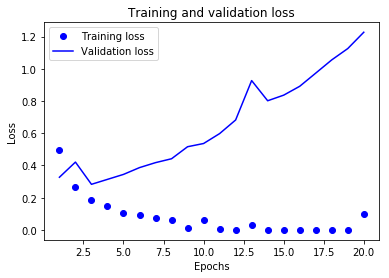

In [19]:
import matplotlib.pyplot as plt

hd = history.history
lv=hd['loss']
vlv=hd['val_loss']
epochs=range(1, len(lv)+1)

plt.plot(epochs, lv, 'bo', label='Training loss')
plt.plot(epochs, vlv, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

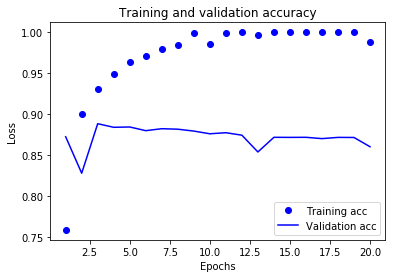

In [18]:
plt.clf()                                      
acc = hd['acc']
val_acc = hd['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()